### Importing Libraries and Data Collection

In [139]:
import pandas as pd

In [140]:
data = pd.read_csv('50_Startups.csv')

In [141]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [143]:
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [144]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Exploratory Data Analysis

#### Inspecting the distribution

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


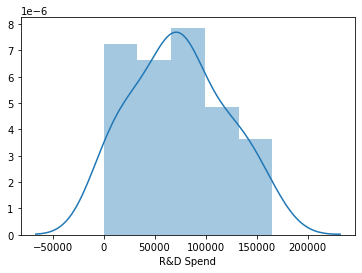

In [146]:
sns.distplot(data['R&D Spend'])
plt.show()

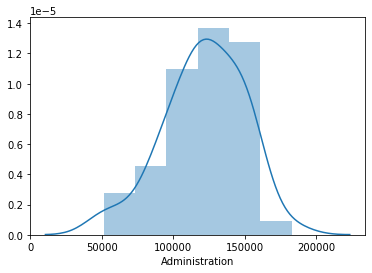

In [147]:
sns.distplot(data['Administration'])
plt.show()

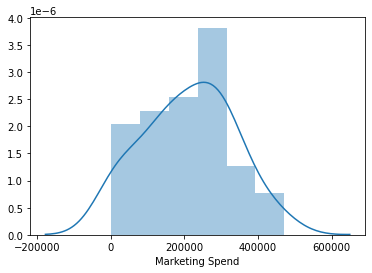

In [148]:
sns.distplot(data['Marketing Spend'])
plt.show()

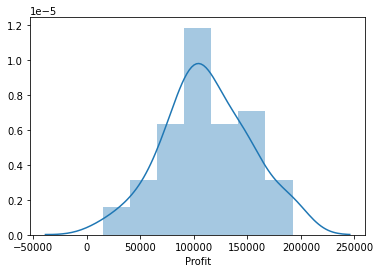

In [149]:
sns.distplot(data['Profit'])
plt.show()

### Almost all numeric features follow normal distribution.

### One-Hot Encoding

In [150]:
#one hot encoding
a = pd.get_dummies(data['State'])

In [151]:
a

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [152]:
df = pd.concat([data, a], axis = 1)

In [153]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   California       50 non-null     uint8  
 6   Florida          50 non-null     uint8  
 7   New York         50 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 2.2+ KB


In [155]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
California         0
Florida            0
New York           0
dtype: int64

In [156]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [157]:
y = df['Profit']

In [158]:
df['R&D Spend'] = df['R&D Spend'].astype(int)

In [159]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']]

#### Inspecting relationship of features with Target Label

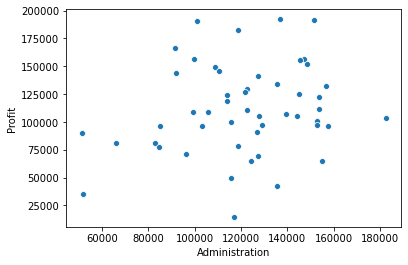

In [160]:
sns.scatterplot('Administration', 'Profit', data = df)
plt.show()

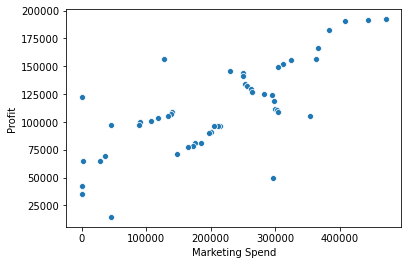

In [161]:
sns.scatterplot('Marketing Spend', 'Profit', data = df)
plt.show()

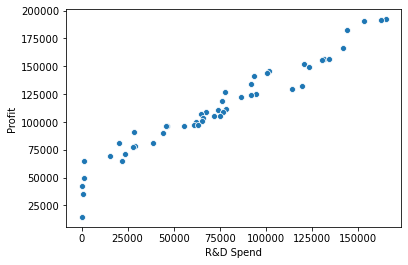

In [162]:
sns.scatterplot('R&D Spend', 'Profit', data = df)
plt.show()

### Splitting Data

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [164]:
print('shape of x_train: ', X_train.shape)
print('shape of x_test: ', X_test.shape)
print('shape of y_train: ', y_train.shape)
print('shape of y_test: ', y_test.shape)

shape of x_train:  (40, 6)
shape of x_test:  (10, 6)
shape of y_train:  (40,)
shape of y_test:  (10,)


### Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [166]:
train = reg.fit(X_train, y_train)
train

LinearRegression()

In [167]:
preds = reg.predict(X_test)

In [168]:
from sklearn.metrics import mean_squared_error
print('Linear Reg MSE: ', mean_squared_error(preds, y_test))

Linear Reg MSE:  83502576.81695588


### Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt

DecisionTreeRegressor(max_depth=3)

In [170]:
train_dt = dt.fit(X_train, y_train)
train_dt

DecisionTreeRegressor(max_depth=3)

In [171]:
dt_preds = dt.predict(X_test)

In [172]:
print('DT MSE: ', mean_squared_error(dt_preds, y_test))

DT MSE:  91996193.70965418


In [180]:
print('DT train score: ', dt.score(X_train, y_train))
print('DT test score: ', dt.score(X_test, y_test))

DT train score:  0.9763919952920249
DT test score:  0.9280656826481832


### Random Forest

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 3)
rf

RandomForestRegressor(n_estimators=3)

In [182]:
train_rf = rf.fit(X_train, y_train)
train_rf

RandomForestRegressor(n_estimators=3)

In [183]:
rf_preds = rf.predict(X_test)

In [184]:
print('RF MSE: ', mean_squared_error(rf_preds, y_test))

RF MSE:  68486278.5870445


In [185]:
print('RF train score: ', rf.score(X_train, y_train))
print('RF test score: ', rf.score(X_test, y_test))

RF train score:  0.9805813312106845
RF test score:  0.9464487225017832


In [186]:
for i in range(4,10):
    RF = RandomForestRegressor(n_estimators = i)
    RF.fit(X_train, y_train)
    print("n_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("TEsting Score = ",RF.score(X_test,y_test))

n_estimator =  4
Training Score = 0.9807756797643464
TEsting Score =  0.9484707544835375
n_estimator =  5
Training Score = 0.9777249829293628
TEsting Score =  0.9450470691032625
n_estimator =  6
Training Score = 0.9908132140115922
TEsting Score =  0.9715963380904714
n_estimator =  7
Training Score = 0.9839348200794203
TEsting Score =  0.9722901991221965
n_estimator =  8
Training Score = 0.9893136652876975
TEsting Score =  0.9759546444453372
n_estimator =  9
Training Score = 0.9842353188128008
TEsting Score =  0.9511739226375686


### Performances

In [138]:
print('Linear Reg MSE: ', mean_squared_error(preds, y_test))
print('Decision Tree MSE: ', mean_squared_error(dt_preds, y_test))
print('Random Forest MSE: ', mean_squared_error(rf_preds, y_test))

Linear Reg MSE:  83502576.81695588
Decision Tree MSE:  48793335.339010015
Random Forest MSE:  45476150.57093444


### Right Balance in performances of train and test can be considered.